# Model Training

In [25]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import os
import sys
from database.queries import get_all_users
from dataframe_builder import build_user_dataframe

In [26]:
df = build_user_dataframe(1) #training data set
# df.head(5)

In [27]:
chest_df = df[df['muscle_group'] == 'chest']
chest_df

,session_id,training_day,date,body_weight,mood,dchest,arms,waist,legs,shoulders,training_duration_minutes,sleep_hours,stress_level,program_phase,exercise,muscle_group,weight,reps,volume
1,1,FULLBODY1,2012-01-02,70.1,tired,82.8,25.2,60.4,45.7,98.6,71.5,6.4,3,deload,Barbell Bench Press,chest,39.9,8,319.2
11,2,FULLBODY2,2012-01-03,70.0,tired,86.1,24.6,59.7,44.8,97.6,60.2,5.8,4,hypertrophy,Cable Flye,chest,19.1,11,210.1
15,3,FULLBODY3,2012-01-06,70.2,okay,84.9,24.3,59.4,45.7,99.0,58.1,7.2,1,hypertrophy,Dumbbell Incline Press,chest,30.1,12,361.2
22,4,FULLBODY1,2012-01-09,70.3,okay,85.4,24.0,60.9,45.6,98.4,55.1,7.8,1,hypertrophy,Barbell Bench Press,chest,47.5,7,332.5
32,5,FULLBODY2,2012-01-11,70.2,tired,85.0,24.4,60.5,44.0,98.9,53.2,6.9,3,hypertrophy,Cable Flye,chest,32.5,7,227.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13966,1996,FULLBODY1,2024-09-30,110.7,okay,132.8,38.0,95.7,70.6,154.2,59.0,7.4,3,hypertrophy,Barbell Bench Press,chest,1357.5,7,9502.5
13976,1997,FULLBODY2,2024-10-01,110.7,tired,131.7,39.1,94.2,72.8,155.9,58.6,5.0,5,hypertrophy,Cable Flye,chest,977.5,9,8797.5
13980,1998,FULLBODY3,2024-10-04,110.6,okay,133.3,38.6,92.4,73.2,154.7,64.9,7.0,2,hypertrophy,Dumbbell Incline Press,chest,1175.0,12,14100.0
13987,1999,FULLBODY1,2024-10-07,110.6,okay,134.8,38.9,94.0,73.7,154.2,63.2,7.2,6,hypertrophy,Barbell Bench Press,chest,1190.0,8,9520.0


In [28]:
y = chest_df['volume']
chest_df = chest_df.drop(columns =['session_id', 'date', 'training_day','weight', 'reps','volume'], axis = 1)

In [29]:
chest_df

,body_weight,mood,dchest,arms,waist,legs,shoulders,training_duration_minutes,sleep_hours,stress_level,program_phase,exercise,muscle_group
1,70.1,tired,82.8,25.2,60.4,45.7,98.6,71.5,6.4,3,deload,Barbell Bench Press,chest
11,70.0,tired,86.1,24.6,59.7,44.8,97.6,60.2,5.8,4,hypertrophy,Cable Flye,chest
15,70.2,okay,84.9,24.3,59.4,45.7,99.0,58.1,7.2,1,hypertrophy,Dumbbell Incline Press,chest
22,70.3,okay,85.4,24.0,60.9,45.6,98.4,55.1,7.8,1,hypertrophy,Barbell Bench Press,chest
32,70.2,tired,85.0,24.4,60.5,44.0,98.9,53.2,6.9,3,hypertrophy,Cable Flye,chest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13966,110.7,okay,132.8,38.0,95.7,70.6,154.2,59.0,7.4,3,hypertrophy,Barbell Bench Press,chest
13976,110.7,tired,131.7,39.1,94.2,72.8,155.9,58.6,5.0,5,hypertrophy,Cable Flye,chest
13980,110.6,okay,133.3,38.6,92.4,73.2,154.7,64.9,7.0,2,hypertrophy,Dumbbell Incline Press,chest
13987,110.6,okay,134.8,38.9,94.0,73.7,154.2,63.2,7.2,6,hypertrophy,Barbell Bench Press,chest


In [30]:
chest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 13997
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   body_weight                2000 non-null   float64
 1   mood                       2000 non-null   object 
 2   dchest                     2000 non-null   float64
 3   arms                       2000 non-null   float64
 4   waist                      2000 non-null   float64
 5   legs                       2000 non-null   float64
 6   shoulders                  2000 non-null   float64
 7   training_duration_minutes  2000 non-null   float64
 8   sleep_hours                2000 non-null   float64
 9   stress_level               2000 non-null   int64  
 10  program_phase              2000 non-null   object 
 11  exercise                   2000 non-null   object 
 12  muscle_group               2000 non-null   object 
dtypes: float64(8), int64(1), object(4)
memory usage: 218

In [ ]:
print("Categoris in 'mood' ")

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = chest_df.select_dtypes(exclude="object").columns
cat_features = chest_df.select_dtypes(include="object").columns

Scaler = StandardScaler()
Encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", Encoder, cat_features),
        ("StandardScaler", Scaler, num_features)
    ]
)

In [32]:
X = preprocessor.fit_transform(chest_df)
X

array([[ 0.        ,  0.        ,  1.        , ...,  1.90020792,
        -1.13405966,  0.3175826 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.414995  ,
        -1.75399023,  1.1085729 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.84525395,
        -0.30748556, -1.26439799],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.54796551,
        -0.51412909, -0.47340769],
       [ 0.        ,  1.        ,  0.        , ...,  0.19966064,
        -0.30748556,  2.69055349],
       [ 0.        ,  1.        ,  0.        , ..., -0.57890317,
        -0.30748556,  0.3175826 ]], shape=(2000, 18))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape


((1600, 18), (400, 18))

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluete Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    model_list.append(name)
    r2_list.append(model_test_r2)
    print(name)
    print('Model performance for Training set')
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- Root Mean Squered Error: {:.4f}'.format(model_train_rmse))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- Root Mean Squered Error: {:.4f}'.format(model_test_rmse))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    print('='*35)
    print('\n')






Linear Regression
Model performance for Training set
- Mean Absolute Error: 551.5983
- Root Mean Squered Error: 693.3111
- R2 Score: 0.9568
----------------------------------
Model performance for Test set
- Mean Absolute Error: 570.4815
- Root Mean Squered Error: 695.9106
- R2 Score: 0.9557


Lasso
Model performance for Training set
- Mean Absolute Error: 551.3742
- Root Mean Squered Error: 693.4088
- R2 Score: 0.9568
----------------------------------
Model performance for Test set
- Mean Absolute Error: 570.3978
- Root Mean Squered Error: 695.4880
- R2 Score: 0.9557


Ridge
Model performance for Training set
- Mean Absolute Error: 551.8982
- Root Mean Squered Error: 693.8420
- R2 Score: 0.9567
----------------------------------
Model performance for Test set
- Mean Absolute Error: 571.5004
- Root Mean Squered Error: 697.7228
- R2 Score: 0.9554


K-Neighbors Regressor
Model performance for Training set
- Mean Absolute Error: 287.2390
- Root Mean Squered Error: 395.4692
- R2 Score: 0.

In [39]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.997767
6,XGBRegressor,0.997534
7,CatBoosting Regressor,0.997086
4,Decision Tree,0.995759
3,K-Neighbors Regressor,0.981995
8,AdaBoost Regressor,0.980858
1,Lasso,0.955735
0,Linear Regression,0.955681
2,Ridge,0.955450


In [40]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.57


Text(0, 0.5, 'Predicted')

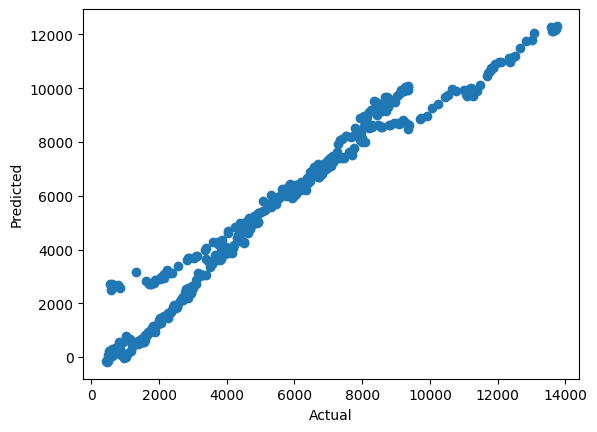

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

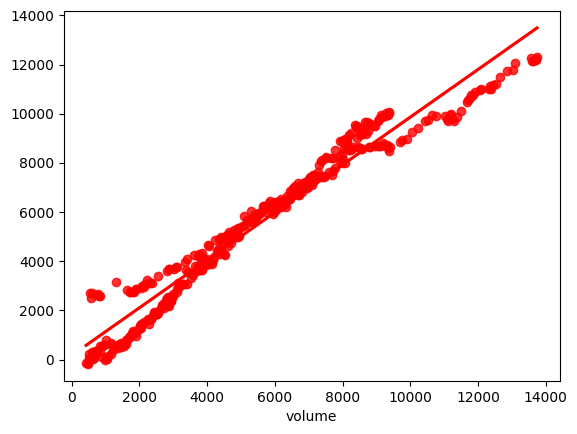

In [43]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [44]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
13021,8887.5,9502.012834,-614.512834
2472,2880.0,3692.512292,-812.512292
9335,5985.0,6005.847058,-20.847058
6336,6720.0,6699.744460,20.255540
9024,9200.0,8813.630590,386.369410
...,...,...,...
6756,7065.0,7399.820145,-334.820145
8989,6160.0,6410.614566,-250.614566
12174,12347.5,11117.899311,1229.600689
1828,1600.0,804.093550,795.906450


In [2]:
while(True):
    print('s')

s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s


: 